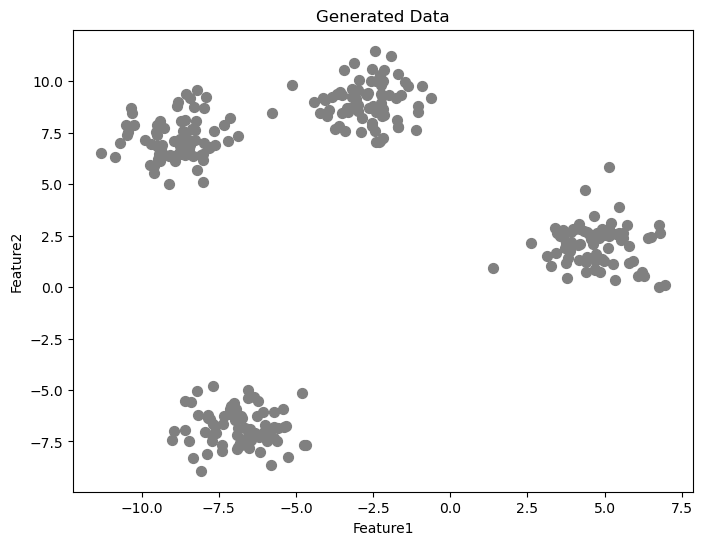

C:\Users\ComputerLAND\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ComputerLAND\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


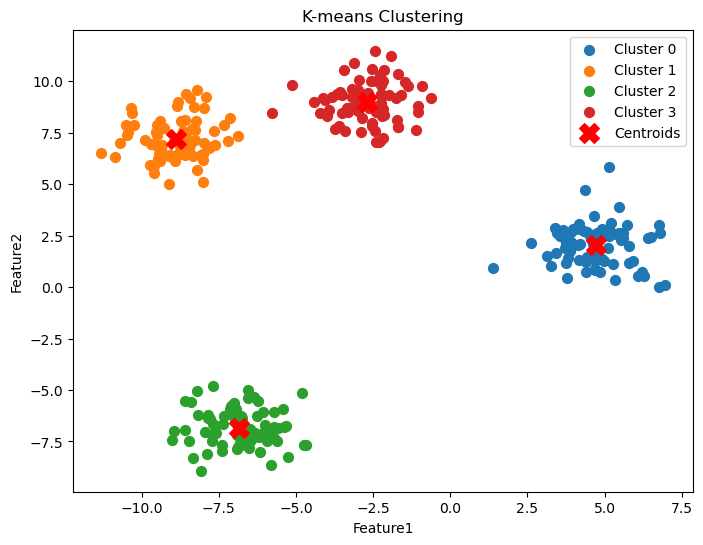

Silhouette Score: 0.79


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Create synthetic data
n_samples = 300
n_features = 2
n_clusters = 4
random_state = 42

# Generate sample data
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature1'], data['Feature2'], s=50, c='gray', marker='o')
plt.title('Generated Data')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

# Predict cluster labels
labels = kmeans.predict(X)

# Add cluster labels to the DataFrame
data['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Feature1'], cluster_data['Feature2'], s=50, label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# Evaluate the clustering performance using silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')